#There are multiple online trained neural networks for face detection and customer profiling.

1. OpenCV: This is a popular computer vision library that includes pre-trained models for gender and age prediction.

2. dlib: Another computer vision library that includes pre-trained models for gender and age prediction.

3. FaceNet: A deep learning model that can be fine-tuned for gender and age prediction.

4. Ageitgey's face_recognition library: This is a Python library that uses dlib and deep learning to perform face recognition, gender and age prediction.

5. PyTorch: A deep learning framework that can be used to train your own models for gender and age prediction.



## We will be using OpenCV pretrained model

In [8]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('/content/download.jpg')
image = cv2.resize(image, (720, 640))

In [4]:
# Importing Models and set mean values
face1 = "/content/drive/MyDrive/Intel SIP/E_Auto/Copy of opencv_face_detector.pbtxt"
face2 = "/content/drive/MyDrive/Intel SIP/E_Auto/Copy of opencv_face_detector_uint8.pb"
age1 = "/content/drive/MyDrive/Intel SIP/E_Auto/Copy of age_deploy.prototxt"
age2 = "/content/drive/MyDrive/Intel SIP/E_Auto/Copy of age_net.caffemodel"
gen1 = "/content/drive/MyDrive/Intel SIP/E_Auto/Copy of gender_deploy.prototxt"
gen2 = "/content/drive/MyDrive/Intel SIP/E_Auto/Copy of gender_net.caffemodel"

MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)

# Face
face = cv2.dnn.readNet(face2, face1)

# age
age = cv2.dnn.readNet(age2, age1)

# gender
gen = cv2.dnn.readNet(gen2, gen1)
la = ['(0-2)', '(4-6)', '(8-12)', '(15-20)',
	'(25-32)', '(38-43)', '(48-53)', '(60-100)']
lg = ['Male', 'Female']


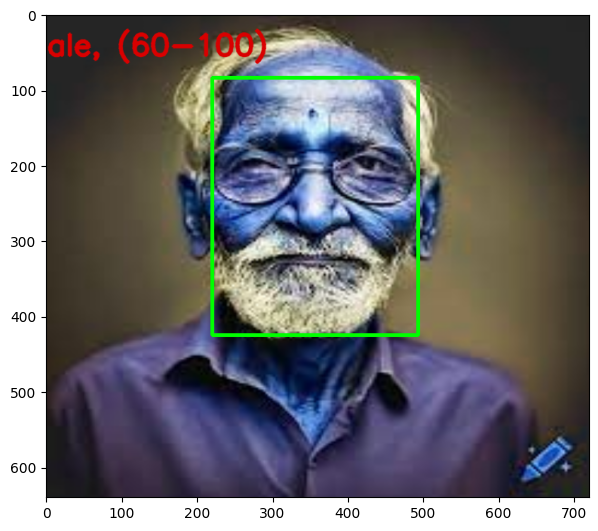

In [9]:
fr_cv = image.copy()
fr_h = fr_cv.shape[0]
fr_w = fr_cv.shape[1]
blob = cv2.dnn.blobFromImage(fr_cv, 1.0, (300, 300),
							[104, 117, 123], True, False)

face.setInput(blob)
detections = face.forward()
faceBoxes = []
for i in range(detections.shape[2]):

	confidence = detections[0, 0, i, 2]
	if confidence > 0.7:

		x1 = int(detections[0, 0, i, 3]*fr_w)
		y1 = int(detections[0, 0, i, 4]*fr_h)
		x2 = int(detections[0, 0, i, 5]*fr_w)
		y2 = int(detections[0, 0, i, 6]*fr_h)

		faceBoxes.append([x1, y1, x2, y2])

		cv2.rectangle(fr_cv, (x1, y1), (x2, y2),
					(0, 255, 0), int(round(fr_h/150)), 8)

if not faceBoxes:
	print("No face detected")

for faceBox in faceBoxes:

	face1 = fr_cv[max(0, faceBox[1]-15):
				min(faceBox[3]+15, fr_cv.shape[0]-1),
				max(0, faceBox[0]-15):min(faceBox[2]+15,
							fr_cv.shape[1]-1)]

	blob = cv2.dnn.blobFromImage(
		face1, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False)

	gen.setInput(blob)
	genderPreds = gen.forward()
	gender = lg[genderPreds[0].argmax()]

	age.setInput(blob)
	agePreds = age.forward()
	age1 = la[agePreds[0].argmax()]

	cv2.putText(fr_cv,
				f'{gender}, {age1}',
				(faceBox[0]-250, faceBox[1]-30),
				cv2.FONT_HERSHEY_SIMPLEX,
				1.3,
				(217, 0, 0),
				4,
				cv2.LINE_AA)

	plt.figure(figsize=(7, 7))
	plt.imshow(fr_cv)